## Some comparisons of filtering and smoothing (can be with or without the viewer)

### Instruction reminders for your tasks 3) and 4)
**You must implement your filtering / smoothing in the FilterSmoother class in the file _Filters.py_. This means also that you can use the visualisation through the Localizer, but you can call filter / smooth also directly from here, without the Localizer. Note also, that you must make use of the given models and the robot simulator in RobotSim! Inspect _Localizer.py_ for inspiration on how to do that!**

### Hint:
You can of course implement the different evaluations (task 4) in a regular .py-file and run Python from the command line! If you use the notebook, you need to restart the kernel after every change in a .py-file that is called from the notebook.


In [5]:
# Main evaluation imports
from models import *
from Filters import FilterSmoother
import numpy as np
import matplotlib.pyplot as plt
import random
from view_control.Localizer import Localizer

def run_localizer(rows, cols, sensor, lag, steps):
    random.seed(42)
    np.random.seed(42)

    sm = StateModel(rows, cols)
    loc = Localizer(sm, sensor, lag)

    errors = []

    for step in range(steps):
        ret, tsX, tsY, tsH, srX, srY, eX, eY, error, fPositions = loc.update()
        errors.append(error)

    return np.array(errors)


### 4x4 Grid – NUF vs UF (Filtering Only)

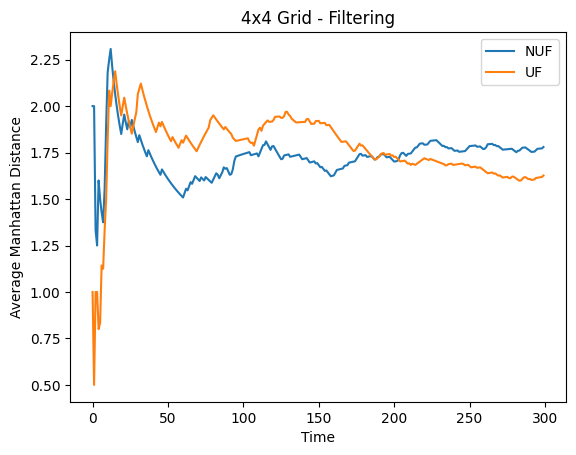

In [6]:
steps = 300

err_nuf_4 = run_localizer(4,4,0,0,steps)
err_uf_4  = run_localizer(4,4,1,0,steps)

plt.plot(np.cumsum(err_nuf_4)/np.arange(1,steps+1), label="NUF")
plt.plot(np.cumsum(err_uf_4)/np.arange(1,steps+1), label="UF")
plt.title("4x4 Grid - Filtering")
plt.ylabel("Average Manhattan Distance")
plt.xlabel("Time")
plt.legend()
plt.show()


### 20x20 Grid – NUF vs UF (Filtering Only)

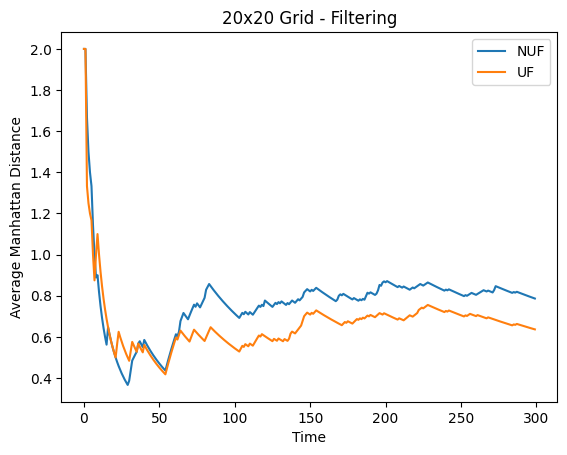

In [7]:
err_nuf_20 = run_localizer(20,20,0,0,steps)
err_uf_20  = run_localizer(20,20,1,0,steps)

plt.plot(np.cumsum(err_nuf_20)/np.arange(1,steps+1), label="NUF")
plt.plot(np.cumsum(err_uf_20)/np.arange(1,steps+1), label="UF")
plt.title("20x20 Grid - Filtering")
plt.ylabel("Average Manhattan Distance")
plt.xlabel("Time")
plt.legend()
plt.show()


### 10x20 Grid – Filtering vs Smoothing (NUF Sensor)

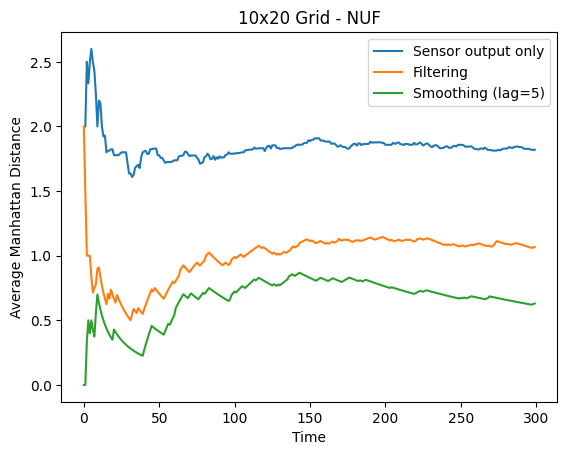

In [20]:
err_filter = run_localizer(10,20,0,0,steps)
err_smooth = run_localizer(10,20,0,5,steps)

random.seed(42)
np.random.seed(42)

sm = StateModel(10, 20)
sensor_only = Localizer(sm, 0, 5)

err_sens = []

for step in range(steps):
    ret, tsX, tsY, tsH, srX, srY, eX, eY, error, fPositions = sensor_only.update()
    # sens_step = sensor_only.update()
    # err_sens.append(manhattan_distance(sens_step[4],sens_step[5], sens_step[1], sens_step[2])
    if ret:
        err_sens.append(np.abs(tsX-srX)+np.abs(tsY-srY))
    else: 
        err_sens.append(np.nan)

err_sens = np.array(err_sens)
cumsum = np.nancumsum(err_sens)
count = np.cumsum(~np.isnan(err_sens))

with np.errstate(invalid='ignore'):  # suppress 0/0 warning at the start
    running_avg = np.where(count > 0, cumsum / count, np.nan)

plt.plot(running_avg, label="Sensor output only")
plt.plot(np.cumsum(err_filter)/np.arange(1,steps+1), label="Filtering")
plt.plot(np.cumsum(err_smooth)/np.arange(1,steps+1), label="Smoothing (lag=5)")
plt.title("10x20 Grid - NUF")
plt.ylabel("Average Manhattan Distance")
plt.xlabel("Time")
plt.legend()
plt.show()


### Quick Single Run Test (Fast Check)

In [ ]:
steps_test = 100
r, c = 8, 8

sm = StateModel(r, c)
loc = Localizer(sm, 0, 5)

tot_err = 0

for step in range(steps_test):
    ret, tsX, tsY, tsH, srX, srY, eX, eY, error, fPositions = loc.update()
    tot_err += error

avg_err = tot_err / steps_test
print("Average error:", avg_err)
